In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 

%matplotlib inline
plt.rc('figure', figsize=(10, 6))
from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

In [4]:
# 가설검정 단계 

대한민국 남성의 평균 몸무게는 70kg이다.

In [5]:
#1. 가설수립
#H0: 대한민국 남성의 평균 몸무게는 70킬로그램이다(차이가없다)
#H1: 대한민국 남성의 평균 몸무게는 70킬로그램이 아니다


#2. 통계량 산출 - 데이터 수집

np.random.seed(123)
weight = np.random.uniform(40, 100, 100)
#weight

test_result = stats.ttest_1samp(weight, 70)
print(f'평균 : {np.mean(weight)}')
print(f'p-value : {test_result.pvalue}')

#3. 기각/채택 여부 판단
print(f'검정결과 : {'귀무가설 기각' if test_result.pvalue<0.05 else '귀무가설채택'}')

#4. 결정
if test_result.pvalue<0.05:
  print('대한민국 남성의 평균 몸무게는 70kg이 아니다.')
else :
  print('대한민국 남성의 평균 몸무게는 70kg이다')


평균 : 70.08573280308887
p-value : 0.953913826658112
검정결과 : 귀무가설채택
대한민국 남성의 평균 몸무게는 70kg이다


In [6]:
# 예제 1
# 문제: 하루 커피 섭취량이 평균 2.5잔이라고 알려져 있다. 
# 실제 설문조사에서 2.8잔이 나왔다. 과연 차이가 통계적으로 유의한가?
# 표본 데이터 (30명)
coffee_data = [2.9, 2.4, 2.7, 3.0, 2.6, 2.8, 2.9, 3.1, 2.7, 2.6,
               2.8, 2.5, 3.2, 3.0, 2.4, 2.6, 2.7, 3.1, 2.8, 2.7,
               2.5, 2.9, 2.6, 2.8, 2.9, 2.5, 2.7, 2.8, 3.0, 2.9]

# 단일표본 t-검정
t_stat, p_value = stats.ttest_1samp(coffee_data, popmean=2.5)

print(f"t값 = {t_stat:.3f}, p값 = {p_value:.3f}")

# As p-value = 0.00 < 0.05 we reject H1 > 2.5 잔과 유의한 차이가 있다 


t값 = 7.031, p값 = 0.000


In [7]:
# 예제 2: 두 그룹 비교 - 이표본(독립표본) t검정
# 문제: A와 B 수업의 시험 평균 점수가 차이가 있는가?
group_A = [78, 85, 82, 88, 76, 81, 79, 84, 82, 80]
group_B = [72, 75, 78, 74, 71, 77, 70, 76, 75, 73]

t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
print(f"t값 = {t_stat:.3f}, p값 = {p_value}")

# As p-value = 0.00 < 0.05 we reject H1 > A와 B 수업의 시험 평균 점수는 차이가 있다. 
# H0
# H1
# 통계량: 5.33, 표준 오차의 5배정도 차이
# 유의확률 : 0000 < 0.05
# conclusion: 두 그룹의 평균은 유의미하게 차이가 있다. 

t값 = 5.331, p값 = 6.046981178914857e-05


In [8]:
# 예제 3: 전후의 비교 -  대응 표본 T 검정 
# 대응 표본 t-검정 예제: 약물 투여 전후 혈압 비교
before = [120, 122, 143, 130, 135, 118, 127, 140, 132, 125]
after = [115, 117, 138, 125, 129, 112, 120, 135, 126, 119]
t_stat, p_value = stats.ttest_rel(before, after)
print(f"t값 = {t_stat:.3f}, p값 = {p_value:}")

# As p-value = 0.00 < 0.05 we reject H1 -> 약물 투여 전 후의 평균 혈압 차이는 없다.  


t값 = 25.327, p값 = 1.1216763497090999e-09


In [9]:
# 예제 4: 범주형 변수 - 카이제곱 검정
# 문제: 성별에 따라 커피를 더 선호하는지?
import numpy as np
obs = np.array([[40, 10],  # 남자 (좋아함, 안좋아함) 교차표
                [30, 20]]) # 여자

chi2, p, dof, expected = stats.chi2_contingency(obs)
print(f"chi2 = {chi2:.3f}, p값 = {p}")

chi2 = 3.857, p값 = 0.04953461343562649


# ANOVA


In [10]:
from scipy.stats import f_oneway

# 세 그룹의 점수
group1 = [80, 85, 90]
group2 = [70, 75, 78]
group3 = [60, 65, 62]

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F값: {f_stat:.2f}, p값: {p_value:.4f}")

#세개 그룹의 평균은 차이가 없다.
#적어도 1개의 그룹은 다르다.
#f값: 24.28 - 그룹간 분산의 차이가 그룹내 분산보다 크다
#p-value 0.0013 < 0.05 -> reject null hypothesis


F값: 24.28, p값: 0.0013


P(A) 사전확률
P(B) 사후확률

P(A|B) -> P(B|A)

Bayes’ Theorem
P(A|B) = (B|A) * P(A) / P(B)

문제: 양성 진단 -> 실제 암일 확률은?
진단의 정확도 95%

- 5%의 오진 p(양성|암')

In [11]:
P_A = 0.1 #암의확률


# 확률로 계산 
## 동전 

In [12]:
space = ['앞면', '뒷면']
event = ['앞면']

prob =lambda event, space : len(event)/len(space)
prob(event,space)

0.5

In [13]:
space = [1,2,3,4,5,6]
event = [3]

prob =lambda event,  space : len(event)/len(space)
prob(event,space)

0.16666666666666666

In [14]:
# 확률의 덧셈 
## 주사위에서 짝수이거나 4보다 큰 수가 나올 확률
space = {1,2,3,4,5,6}
event_a = {2,4,6}
event_b = {5,6}

In [15]:
합집합 = event_a | event_b
합집합

{2, 4, 5, 6}

In [16]:
합집합의갯수 = len(합집합)
전체경우의수 = len(space)
확률1 = 합집합의갯수 / 전체경우의수
확률1 # 짝수 또는 4보다 큰 숫자

0.6666666666666666

In [17]:
# 2이하거나 5이상인 눈이 나올 확률 
event_c = {1,2}
event_d = {5,6}
합집합_2 = event_c | event_d
합집합의갯수_2 = len(합집합_2)
전체경우의수 = len(space)
확률2 = 합집합의갯수_2 / 전체경우의수
확률2 # 짝수 또는 4보다 큰 숫자

0.6666666666666666

In [18]:
# 조건부 확률
# 주사위를 던져 짝수 & 2일 확률
sample_space = [1,2,3,4,5,6]
event_a = [2,4,6]
event_b = [2]
P_A = len(event_a)/len(sample_space)
P_B = len(event_b)/len(sample_space)
P_B_and_A_ele = set(event_a) & set(event_b) # intersection
P_B_and_A_ele

{2}

In [19]:
P_B_and_A = len(P_B_and_A_ele)/len(sample_space) # prob of intersection
P_B_and_A

0.16666666666666666

In [20]:
# 조건부확률 : 짝수일때 2가 나올 확률 
# P(B|A) = P(B_and_A)/P_A
P_B_given_A = P_B_and_A / P_A
P_B_given_A

0.3333333333333333

동전 10번 던지고, 8번 앞면이 나왔다   
우도의 계산

In [21]:
from scipy.stats import binom

In [22]:
n = 10
k = 8
p1 = 0.5 # 앞면이 나올 확률 - 공정할 경우 
p1_likelihood = binom.pmf( k, n, p1) 

p2 = 0.8
p2_likelihood = binom.pmf( k, n, p2) 

p1_likelihood, p2_likelihood

(np.float64(0.04394531250000005), np.float64(0.30198988799999993))

가설1의 경우, 앞면이 8번 나올 홧률은 4.4%
가설2의 경우, 앞면이 8번 나올 확률은 30.2%

앞면 8번 나오는 관측값은 0.8인 모델이 더 잘 설명한다. (우도가 크다)

기대값   
x의 확률들의 평균 

In [23]:
x_values = [1,2,3]
p_x = [1/6, 3/6, 2/6]

exp_value = 0
# 기대값 
for i in range (len(x_values)):
    exp_value += x_values[i] * p_x[i]
    
print(f'기대값 : {exp_value:.5f}')

기대값 : 2.16667


In [24]:
from scipy.stats import norm

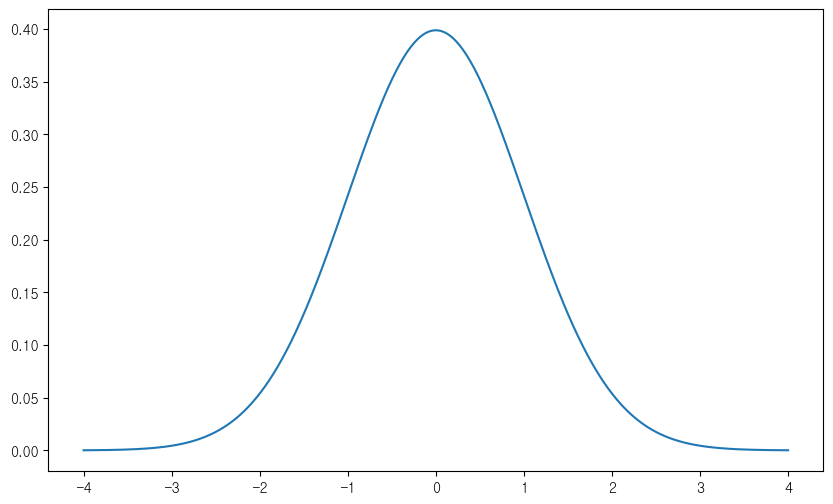

In [25]:
mu = 0
sigma = 1
x = np.linspace(-4,4,1000)
y = norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x,y)
plt.show()

# 표집분포 

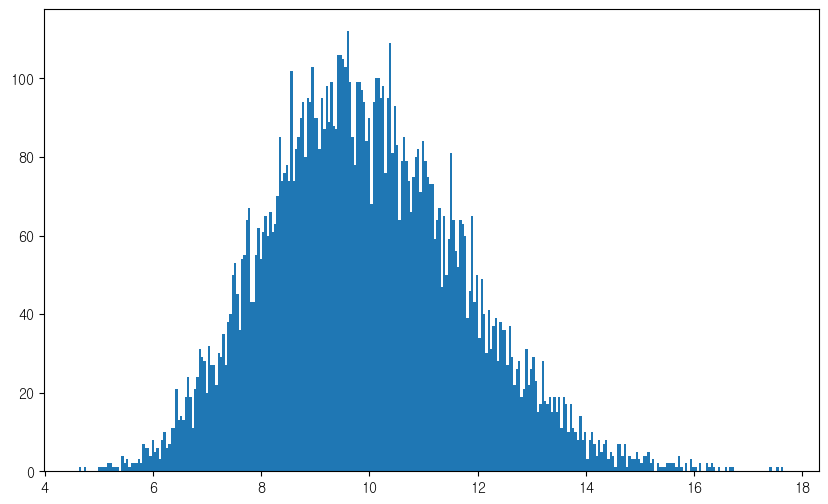

In [28]:
np.random.seed(0)
X_pop = np.random.exponential(scale=10, size=10000)
sample_mean = [np.mean(np.random.choice(X_pop, size=30))
               for _ in range(10000)]
plt.hist(sample_mean, bins=300)
plt.show()


In [30]:
# z점수
mu = 100
sigma = 10

x1 = 110
x2 = 125

# z점수 = 원점수 - 평균 / 표준편차
z_x1 = (x1 - mu) /sigma
z_x2 = (x2 - mu) /sigma

z_x1, z_x2

(1.0, 2.5)

z_x1 = 0.8413 -> 0.5 -> 0.3413

z_x2 = 0.9938 -> 0.5 -> 0.4938

z_x2 - z_x1= 0.1525

전체 분포에서 x1~x2 사이의 면적 

In [32]:
area_z_x1 = norm.cdf(z_x1) - norm.cdf(0)
area_z_x2 = norm.cdf(z_x2) - norm.cdf(0)
diff_area = area_z_x2 - area_z_x1
diff_area

np.float64(0.15244558860568092)

In [ ]:
# 시각화
x = np.linspace(mu-4*sigma, mu+4*sigma, 1000)
y = norm.pdf(x, mu, sigma)


이산확률분포

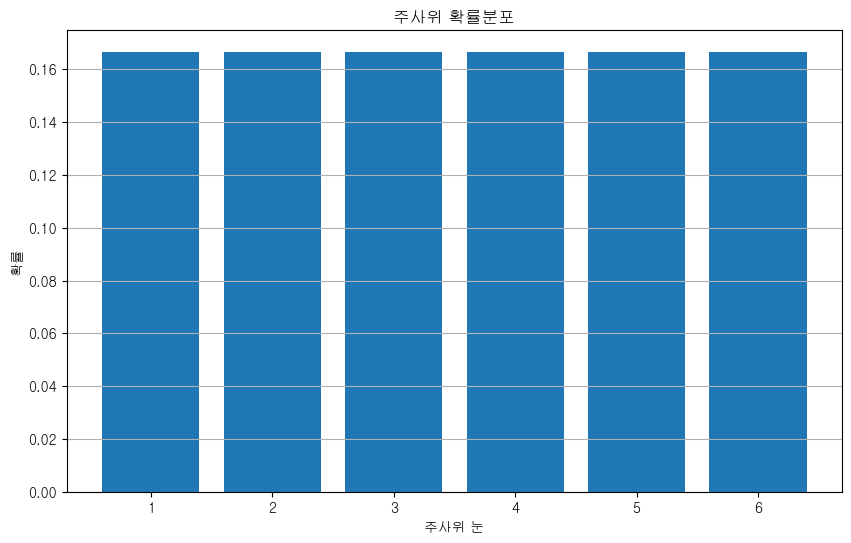

In [33]:
# 주사위 눈 (1~6)
x = np.arange(1, 7)
# 공정한 주사위의 확률분포: 모두 1/6
probs = [1/6] * 6  #6을 곱하는 이유는  6번 반복해서 리스트로 만든다는 의미 - 각 눈별로 확률이 동일하므로 모두 1/6로 설정

# 시각화
plt.bar(x, probs)
plt.xticks(x)
plt.xlabel("주사위 눈")
plt.ylabel("확률")
plt.title("주사위 확률분포")
plt.grid(axis='y')
plt.show()

In [36]:
# 기대값 
data = {
    '상금' : [0, 100, 1000], #x
    '확률' : [0.5, 0.3, 0.2] #f(x)   
}

df = pd.DataFrame(data)
df['exp_value'] = df['상금']*df['확률']
print(f'복권의 기대값 : {df['exp_value'].sum()} 원')

복권의 기대값 : 230.0 원


동전 1회 던지기 결과: 뒷면
1000번 던졌을 때 앞면 나온 횟수: 508
앞면 나올 확률 (이론값: 0.5, 실험값: 0.5080)


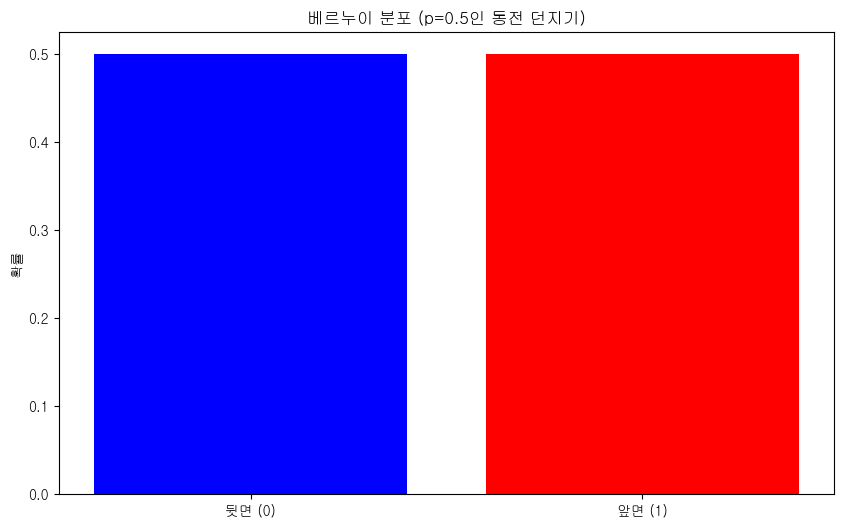

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# 베르누이 분포 파라미터 설정
p = 0.5  # 앞면이 나올 확률

# 베르누이 확률변수 생성
X = bernoulli(p)

# 1회 시행 결과 시뮬레이션 (0: 뒷면, 1: 앞면)
result = X.rvs(size=1)
print(f"동전 1회 던지기 결과: {'앞면' if result[0] == 1 else '뒷면'}")

# 여러 번 시행 결과 시뮬레이션
n_trials = 1000
results = X.rvs(size=n_trials)

# 결과 분석
success_count = np.sum(results)
success_rate = success_count / n_trials

print(f"1000번 던졌을 때 앞면 나온 횟수: {success_count}")
print(f"앞면 나올 확률 (이론값: {p}, 실험값: {success_rate:.4f})")

# 시각화
plt.figure(figsize=(10, 6))
plt.bar([0, 1], [1-p, p], color=['blue', 'red'])
plt.xticks([0, 1], ['뒷면 (0)', '앞면 (1)'])
plt.ylabel('확률')
plt.title('베르누이 분포 (p=0.5인 동전 던지기)')
plt.show()

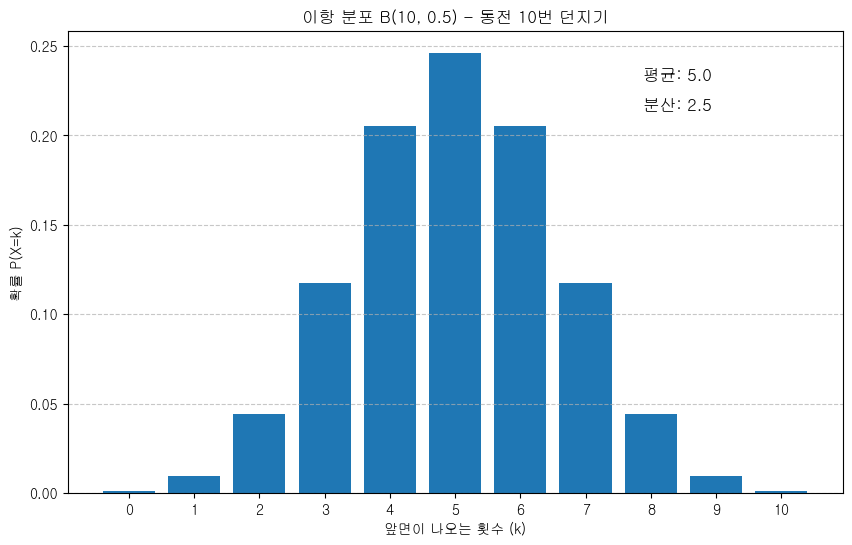

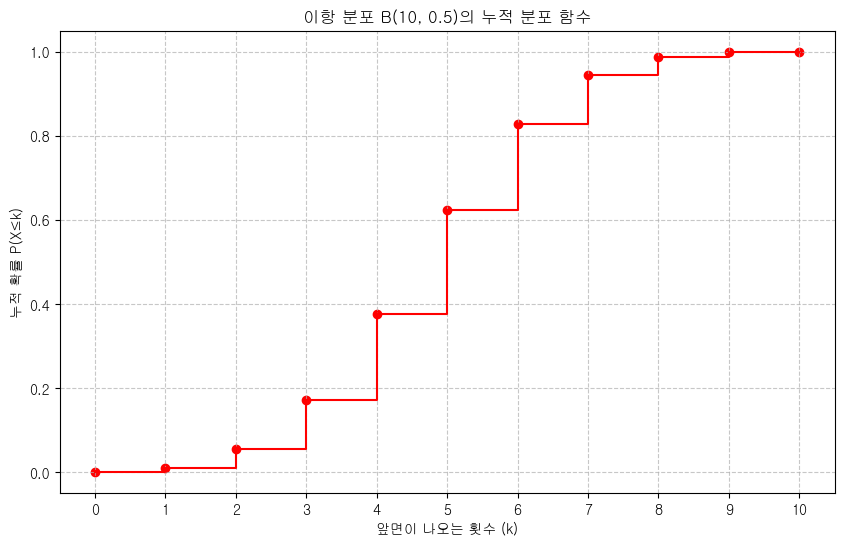

In [38]:
from scipy.stats import binom

# 이항 분포 파라미터 설정
n = 10  # 시행 횟수
p = 0.5  # 성공 확률(동전 앞면이 나올 확률)

# 이항 확률변수 생성
X = binom(n, p)

# 가능한 모든 결과값(0부터 n까지)
k_values = np.arange(0, n+1)

# 각 결과값의 확률 계산
pmf_values = X.pmf(k_values)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values)
plt.xlabel('앞면이 나오는 횟수 (k)')
plt.ylabel('확률 P(X=k)')
plt.title(f'이항 분포 B({n}, {p}) - 동전 10번 던지기')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 평균과 분산 출력
mean = n * p
var = n * p * (1-p)
plt.figtext(0.7, 0.8, f'평균: {mean}', fontsize=12)
plt.figtext(0.7, 0.75, f'분산: {var}', fontsize=12)

plt.show()

# 누적 분포 함수(CDF) 계산 및 시각화
cdf_values = X.cdf(k_values)

plt.figure(figsize=(10, 6))
plt.step(k_values, cdf_values, where='post', color='red')
plt.scatter(k_values, cdf_values, color='red')
plt.xlabel('앞면이 나오는 횟수 (k)')
plt.ylabel('누적 확률 P(X≤k)')
plt.title(f'이항 분포 B({n}, {p})의 누적 분포 함수')
plt.xticks(k_values)
plt.grid(linestyle='--', alpha=0.7)
plt.show()


# 이항분포를 적용할 수 있는 사례

1. 시험 합격률이 70%, 100명, 80명 이상 합격할 확률 
2. 불량률 5%, 20개 샘플, 불량제품이 

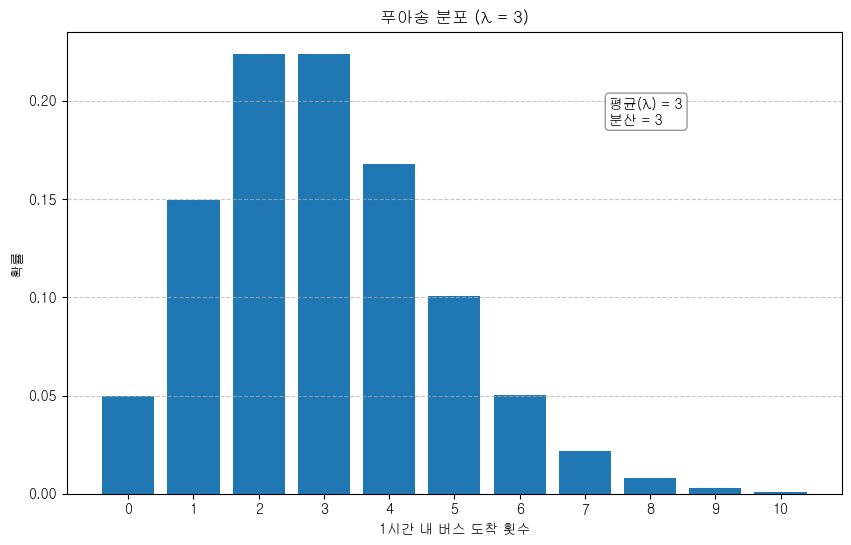

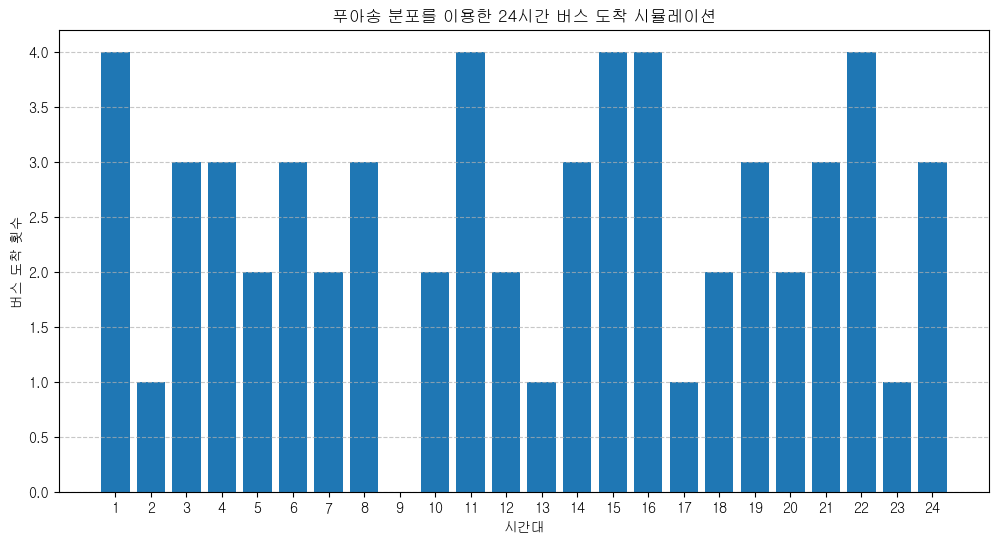

In [39]:
# 푸아송 분포 - 버스 도착 시뮬레이션
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 파라미터 설정
lambda_val = 3  # 1시간당 평균 버스 도착 횟수

# 푸아송 확률변수 생성
X = poisson(lambda_val)

# 가능한 버스 도착 횟수 (0부터 10까지)
k_values = np.arange(0, 11)

# 각 값에 대한 확률 계산
pmf_values = X.pmf(k_values)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values)
plt.xlabel('1시간 내 버스 도착 횟수')
plt.ylabel('확률')
plt.title(f'푸아송 분포 (λ = {lambda_val})')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 평균과 분산 표시
plt.annotate(f'평균(λ) = {lambda_val}\n분산 = {lambda_val}', 
             xy=(0.7, 0.8), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.show()

# 시뮬레이션: 하루(24시간) 동안의 버스 도착 패턴
np.random.seed(42)
hours = np.arange(1, 25)
arrivals = np.random.poisson(lambda_val, size=24)

plt.figure(figsize=(12, 6))
plt.bar(hours, arrivals)
plt.xlabel('시간대')
plt.ylabel('버스 도착 횟수')
plt.title('푸아송 분포를 이용한 24시간 버스 도착 시뮬레이션')
plt.xticks(hours)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

카이 제곱 분포에서 적합도/독립성 검정 
H0 : 범주 간 차이가 있다
H1 : 차이가 있다. 샘플링한 그룹에 편향이 있을 수 있다. 적합도가 떨어진다

카이제곱 통계량 > 관측값과 기대값과의 차이를 수치화

이산 확률 분포 
- 베르누이 : 성공 | 실패 
- 이항분포 : 횟수, 성공의 횟수를 모겔링
- poisson dist : 단위 (시간/공간) 내에서 사건의 발생 횟수를 모델링, 평균 발생률 
- 기하분포, 초기하분포, 다항분포

연속 확률분포
- 정규분포 : 평균중심 - 좌우대칭, 평균/
- 표준정규분포
- 카이제곱분포
- f분포